In [255]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [256]:
# reading the file 
df = pd.read_csv('TSLA.CSV', parse_dates=True, index_col='Date')

In [257]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 758 entries, 2019-05-21 to 2022-05-20
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          758 non-null    float64
 1   High          758 non-null    float64
 2   Low           758 non-null    float64
 3   Close         758 non-null    float64
 4   Volume        758 non-null    int64  
 5   Dividends     758 non-null    int64  
 6   Stock Splits  758 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 47.4 KB


<AxesSubplot: xlabel='Date'>

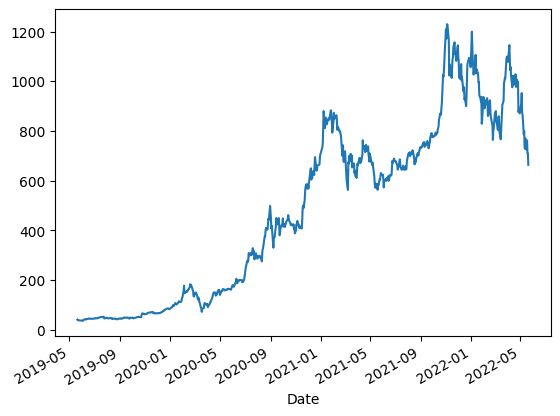

In [259]:
df['Close'].plot()

In [260]:
len(df)

758

In [261]:
df = df['Close']

In [262]:
df.reset_index(drop=True, inplace=True)
df.shape

# this is pandas series not data frame 

(758,)

In [263]:
df = pd.DataFrame(df)

In [264]:
df.shape

(758, 1)

# Train Test Split

In [265]:
train = df.iloc[:700]
test = df.iloc[700:]

# Performing scaling


In [266]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to your training data
scaler.fit(train)


MinMaxScaler()

# fitting the training data in scalar

In [267]:

scaler.fit(train)

MinMaxScaler()

# Maximum and minimum value for trained and test data set

In [268]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Deep Learning model

In [269]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

## Creating the Model 

In [270]:
test.shape

(58, 1)

In [271]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module keras.preprocessing.sequence:

class TimeseriesGenerator(keras.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  
 |  Deprecated: `tf.keras.preprocessing.sequence.TimeseriesGenerator` does not
 |  operate on tensors and is not recommended for new code. Prefer using a
 |  `tf.data.Dataset` which provides a more efficient and flexible mechanism for
 |  batching, shuffling, and windowing input. See the
 |  [tf.data guide](https://www.tensorflow.org/guide/data) for more details.
 |  
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  
 |  Arguments:
 |      data: Indexable generator (such as li

In [272]:
length = 58    # length should be equal to size of test data
batch_size = 32
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size = batch_size)

# we will cereate an object with train - length and last 16 values will be predicted and validated

In [273]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout

In [274]:
n_features = 1

In [275]:
model = Sequential()
model.add(SimpleRNN(40, input_shape = (length, n_features)))
# here 60 is neuron and this should be minimun the length size of test data
model.add(Dropout(rate = 0.2))
# fully connected layers occupies most of the parameters, and hence, neurons develop co-dependency amongst each other
# during training which curbs  the individual power of each neuron leading to overfitting of training data
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [276]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_11 (SimpleRNN)   (None, 40)                1680      
                                                                 
 dropout_11 (Dropout)        (None, 40)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 41        
                                                                 
Total params: 1,721
Trainable params: 1,721
Non-trainable params: 0
_________________________________________________________________


In [277]:
model.fit_generator(generator, epochs=  10, shuffle=False)

Epoch 1/10


C:\Users\PC\AppData\Local\Temp\ipykernel_20788\1279320061.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=  10, shuffle=False)


21/21 [==============================] - 3s 10ms/step - loss: 0.0177
Epoch 2/10
21/21 [==============================] - 0s 10ms/step - loss: 0.0138
Epoch 3/10
21/21 [==============================] - 0s 10ms/step - loss: 0.0136
Epoch 4/10
21/21 [==============================] - 0s 9ms/step - loss: 0.0072
Epoch 5/10
21/21 [==============================] - 0s 10ms/step - loss: 0.0051
Epoch 6/10
21/21 [==============================] - 0s 10ms/step - loss: 0.0058
Epoch 7/10
21/21 [==============================] - 0s 9ms/step - loss: 0.0062
Epoch 8/10
21/21 [==============================] - 0s 9ms/step - loss: 0.0045
Epoch 9/10
21/21 [==============================] - 0s 9ms/step - loss: 0.0051
Epoch 10/10
21/21 [==============================] - 0s 9ms/step - loss: 0.0039


In [278]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot: >

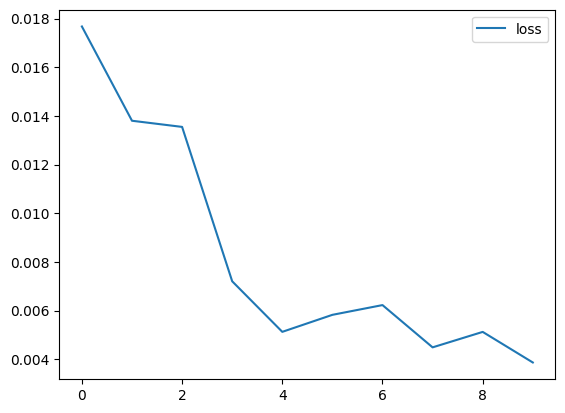

In [279]:
losses.plot()

In [280]:
first_eval_batch = scaled_train[-length:]

In [281]:
first_eval_batch

array([[0.81500958],
       [0.85080174],
       [0.86521404],
       [0.8106465 ],
       [0.82172586],
       [0.77933463],
       [0.77271888],
       [0.78735731],
       [0.74626415],
       [0.7509957 ],
       [0.72367004],
       [0.75598686],
       [0.81489233],
       [0.86357269],
       [0.88613327],
       [0.8815525 ],
       [0.87964311],
       [0.86636971],
       [0.85501409],
       [0.97476794],
       [0.9327368 ],
       [0.88125941],
       [0.86164654],
       [0.83004158],
       [0.85613623],
       [0.86139537],
       [0.89641705],
       [0.83389388],
       [0.84900961],
       [0.83301453],
       [0.8038214 ],
       [0.80434061],
       [0.76048391],
       [0.74884347],
       [0.7391292 ],
       [0.75504888],
       [0.6643458 ],
       [0.67879164],
       [0.75447104],
       [0.74989027],
       [0.72846017],
       [0.71630059],
       [0.74324938],
       [0.72986712],
       [0.74214396],
       [0.75051835],
       [0.72753063],
       [0.690

In [282]:
first_eval_batch = first_eval_batch.reshape((1,length,1))

In [283]:
first_eval_batch

array([[[0.81500958],
        [0.85080174],
        [0.86521404],
        [0.8106465 ],
        [0.82172586],
        [0.77933463],
        [0.77271888],
        [0.78735731],
        [0.74626415],
        [0.7509957 ],
        [0.72367004],
        [0.75598686],
        [0.81489233],
        [0.86357269],
        [0.88613327],
        [0.8815525 ],
        [0.87964311],
        [0.86636971],
        [0.85501409],
        [0.97476794],
        [0.9327368 ],
        [0.88125941],
        [0.86164654],
        [0.83004158],
        [0.85613623],
        [0.86139537],
        [0.89641705],
        [0.83389388],
        [0.84900961],
        [0.83301453],
        [0.8038214 ],
        [0.80434061],
        [0.76048391],
        [0.74884347],
        [0.7391292 ],
        [0.75504888],
        [0.6643458 ],
        [0.67879164],
        [0.75447104],
        [0.74989027],
        [0.72846017],
        [0.71630059],
        [0.74324938],
        [0.72986712],
        [0.74214396],
        [0

In [284]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 341ms/step


array([[0.6312492]], dtype=float32)

In [285]:
scaled_test[0]

array([0.69388231])

In [286]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]

    test_predictions.append(current_pred)

    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 37ms/step


In [287]:
test_predictions

[array([0.6312492], dtype=float32),
 array([0.6395628], dtype=float32),
 array([0.6289015], dtype=float32),
 array([0.61158776], dtype=float32),
 array([0.62656647], dtype=float32),
 array([0.61738867], dtype=float32),
 array([0.57892233], dtype=float32),
 array([0.599604], dtype=float32),
 array([0.555734], dtype=float32),
 array([0.59381795], dtype=float32),
 array([0.5425854], dtype=float32),
 array([0.55839723], dtype=float32),
 array([0.5568111], dtype=float32),
 array([0.5347517], dtype=float32),
 array([0.5310031], dtype=float32),
 array([0.5479706], dtype=float32),
 array([0.48473972], dtype=float32),
 array([0.5453818], dtype=float32),
 array([0.44950506], dtype=float32),
 array([0.51838654], dtype=float32),
 array([0.46855682], dtype=float32),
 array([0.47292516], dtype=float32),
 array([0.48644665], dtype=float32),
 array([0.4488396], dtype=float32),
 array([0.41918418], dtype=float32),
 array([0.47337925], dtype=float32),
 array([0.3549627], dtype=float32),
 array([0.486452

In [288]:
true_predictions = scaler.inverse_transform(test_predictions)

In [289]:
true_predictions

array([[ 789.57877813],
       [ 799.50617672],
       [ 786.77534266],
       [ 766.10075341],
       [ 783.98706743],
       [ 773.02770451],
       [ 727.09443785],
       [ 751.79076268],
       [ 699.40485419],
       [ 744.88153412],
       [ 683.70389313],
       [ 702.58508938],
       [ 700.69105513],
       [ 674.34959453],
       [ 669.87333628],
       [ 690.13447075],
       [ 614.62947238],
       [ 687.04313297],
       [ 572.55519997],
       [ 654.80768204],
       [ 595.30521261],
       [ 600.52151149],
       [ 616.66774249],
       [ 571.76056823],
       [ 536.34854762],
       [ 601.06375718],
       [ 459.66065862],
       [ 616.67439734],
       [ 429.2853983 ],
       [ 532.03798444],
       [ 490.76140431],
       [ 446.24259568],
       [ 491.17770607],
       [ 439.81052339],
       [ 359.37058036],
       [ 528.69276592],
       [ 236.87006609],
       [ 520.66171477],
       [ 262.05594942],
       [ 352.78160309],
       [ 366.22190817],
       [ 221.530

In [290]:
test['predictions'] = true_predictions

C:\Users\PC\AppData\Local\Temp\ipykernel_20788\349349345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = true_predictions


In [291]:
test

,Close,predictions
700,864.369995,789.578778
701,879.890015,799.506177
702,839.289978,786.775343
703,838.289978,766.100753
704,804.580017,783.987067
705,824.400024,773.027705
706,858.969971,727.094438
707,838.299988,751.790763
708,795.349976,699.404854
709,766.369995,744.881534


<AxesSubplot: >

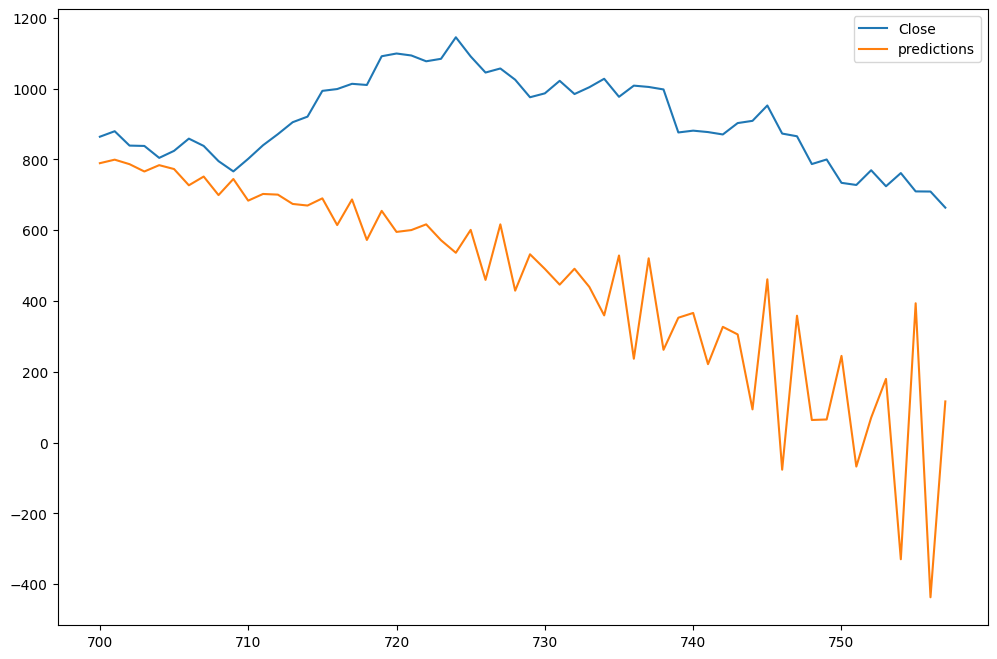

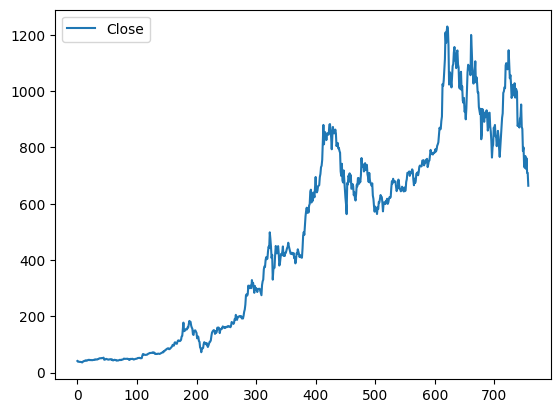

In [292]:
test.plot(figsize=(12,8))
df.plot()

In [293]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)


In [294]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size = 32)

In [295]:
model = Sequential()

model.add(SimpleRNN(30, input_shape = (length, n_features)))
model.add(Dropout(rate=0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss= 'mse')

In [296]:
model.fit_generator(generator, epochs= 10, shuffle=False)

Epoch 1/10


C:\Users\PC\AppData\Local\Temp\ipykernel_20788\63610975.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs= 10, shuffle=False)


22/22 [==============================] - 2s 9ms/step - loss: 0.0231
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 0.0128
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 0.0081
Epoch 4/10
22/22 [==============================] - 0s 9ms/step - loss: 0.0085
Epoch 5/10
22/22 [==============================] - 0s 8ms/step - loss: 0.0094
Epoch 6/10
22/22 [==============================] - 0s 9ms/step - loss: 0.0064
Epoch 7/10
22/22 [==============================] - 0s 8ms/step - loss: 0.0052
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 0.0046
Epoch 9/10
22/22 [==============================] - 0s 9ms/step - loss: 0.0044
Epoch 10/10
22/22 [==============================] - 0s 11ms/step - loss: 0.0039


<AxesSubplot: >

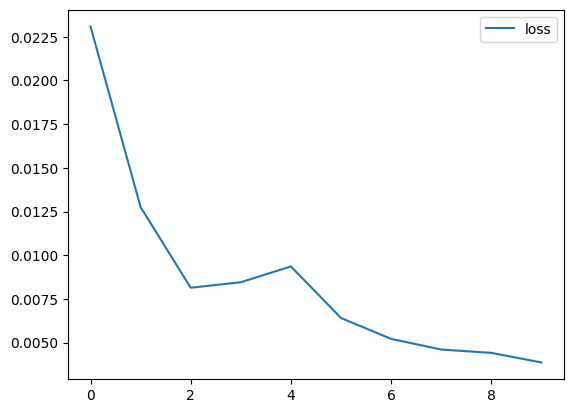

In [297]:
full_model_losses = pd.DataFrame(model.history.history)
full_model_losses.plot()

In [298]:
forecast = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(20):
    current_pred = model.predict(current_batch)[0]

    forecast.append(current_pred)

    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)


1/1 [==============================] - 0s 36ms/step


In [299]:
forecast = scaler.inverse_transform(forecast)

In [300]:
forecast

array([[832.89772093],
       [833.84228252],
       [829.88759366],
       [807.47356196],
       [831.11251304],
       [845.97268545],
       [846.21987575],
       [849.45100096],
       [852.38397468],
       [823.41210471],
       [823.87338899],
       [816.78992436],
       [831.24582355],
       [821.0162165 ],
       [820.87472087],
       [845.18883669],
       [810.36326136],
       [839.17427614],
       [824.43161343],
       [844.77182318]])

In [301]:
forecast.flatten()

array([832.89772093, 833.84228252, 829.88759366, 807.47356196,
       831.11251304, 845.97268545, 846.21987575, 849.45100096,
       852.38397468, 823.41210471, 823.87338899, 816.78992436,
       831.24582355, 821.0162165 , 820.87472087, 845.18883669,
       810.36326136, 839.17427614, 824.43161343, 844.77182318])

In [302]:
df_array = np.array(df)
df_array

array([[  41.01599884],
       [  38.54600143],
       [  39.09799957],
       [  38.12599945],
       [  37.74000168],
       [  37.97200012],
       [  37.64400101],
       [  37.0320015 ],
       [  35.79399872],
       [  38.72000122],
       [  39.31800079],
       [  41.18999863],
       [  40.90000153],
       [  42.57600021],
       [  43.41999817],
       [  41.85200119],
       [  42.7820015 ],
       [  42.98400116],
       [  45.00600052],
       [  44.94800186],
       [  45.2859993 ],
       [  43.92399979],
       [  44.37200165],
       [  44.72800064],
       [  43.95199966],
       [  43.85400009],
       [  44.56800079],
       [  44.69200134],
       [  45.43399811],
       [  44.90999985],
       [  46.97999954],
       [  46.61999893],
       [  46.06800079],
       [  46.01200104],
       [  47.7840004 ],
       [  47.72000122],
       [  49.01599884],
       [  50.70000076],
       [  50.47600174],
       [  50.97200012],
       [  50.70800018],
       [  51.636

In [303]:
df_array.shape

(758, 1)

In [307]:
# Assuming df_array is your existing NumPy array
df_array = np.array(df)

# Assuming forecast is a NumPy array
# Convert forecast to a Pandas DataFrame
forecast_df = pd.DataFrame(forecast, columns=['forecast'])

# Concatenate df_array and forecast_df horizontally (axis=1)
full_data = pd.concat([pd.DataFrame(df_array), forecast_df], axis=1)

<AxesSubplot: >

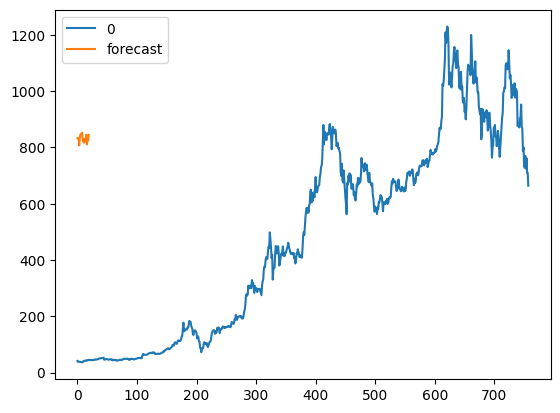

In [308]:
full_data.plot()

In [309]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)


In [310]:
length

58

In [311]:
scaled_test.shape

(58, 1)

In [312]:
length = 15 
generator  = TimeseriesGenerator(scaled_train, scaled_train, length = length, batch_size = 32)
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length= length, batch_size = 32)

In [313]:
model = Sequential()
model.add(LSTM(30, input_shape = (length, n_features)))
model.add(Dropout(rate=0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss = 'mse' )

In [314]:
model.fit_generator(generator,epochs=20,
                    validation_data = validation_generator, 
                    callbacks = [early_stop], shuffle = False)

Epoch 1/20


C:\Users\PC\AppData\Local\Temp\ipykernel_20788\846739660.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=20,


22/22 [==============================] - 6s 66ms/step - loss: 0.1059 - val_loss: 0.1207
Epoch 2/20
22/22 [==============================] - 0s 11ms/step - loss: 0.0188 - val_loss: 0.0112
Epoch 3/20
22/22 [==============================] - 0s 11ms/step - loss: 0.0160 - val_loss: 0.0104
Epoch 4/20
22/22 [==============================] - 0s 11ms/step - loss: 0.0096 - val_loss: 0.0076
Epoch 5/20
22/22 [==============================] - 0s 11ms/step - loss: 0.0069 - val_loss: 0.0075
Epoch 6/20
22/22 [==============================] - 0s 11ms/step - loss: 0.0062 - val_loss: 0.0077
Epoch 7/20
22/22 [==============================] - 0s 11ms/step - loss: 0.0060 - val_loss: 0.0071
Epoch 8/20
22/22 [==============================] - 0s 12ms/step - loss: 0.0054 - val_loss: 0.0070
Epoch 9/20
22/22 [==============================] - 0s 11ms/step - loss: 0.0054 - val_loss: 0.0084
Epoch 10/20
22/22 [==============================] - 0s 11ms/step - loss: 0.0062 - val_loss: 0.0075


<AxesSubplot: >

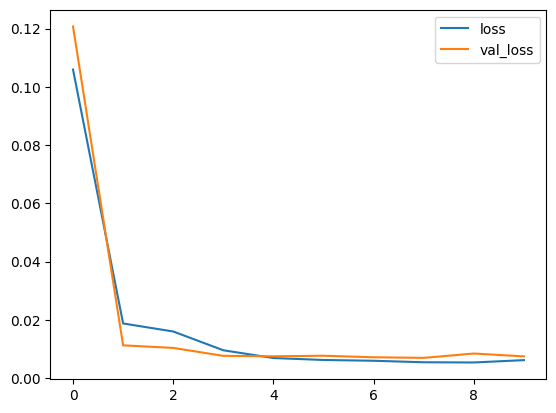

In [315]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [316]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length, n_features))

for i in range(len(test)):

    current_pred = model.predict(current_batch)[0]

    test_predictions.append(current_pred)

    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis = 1)
    

1/1 [==============================] - 0s 35ms/step


C:\Users\PC\AppData\Local\Temp\ipykernel_20788\1875609471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM_predictions'] = true_predictions


<AxesSubplot: >

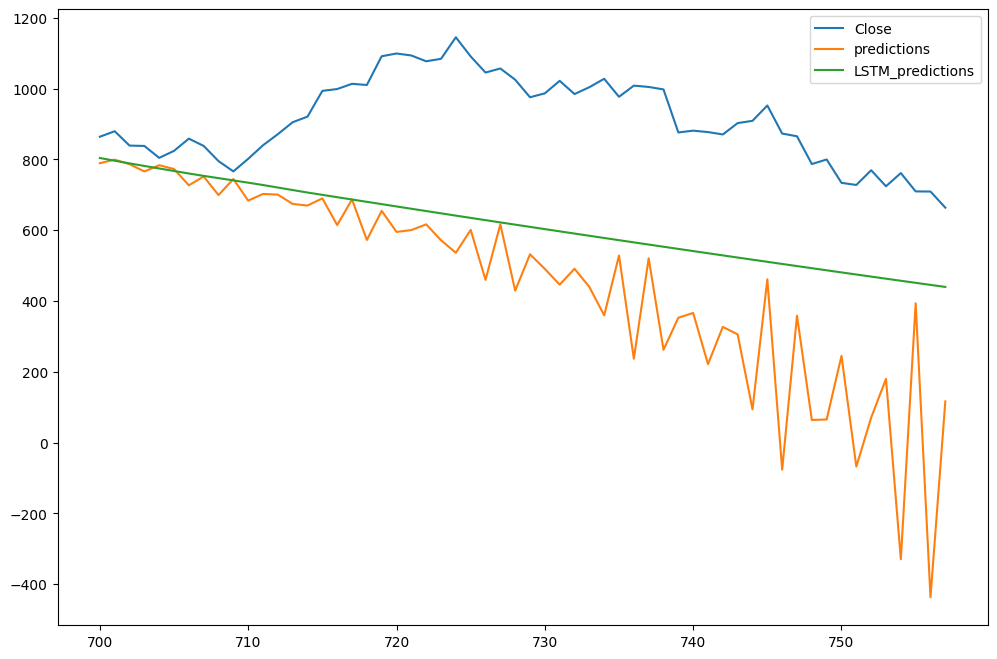

In [317]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM_predictions'] = true_predictions
test.plot(figsize=(12,8))